# Effective area

This notebook gives an example on how to use the effective area for ARCA230. The effective area is the area of the detector, but corrected for the detection efficiency, interaction probability and selection criteria. The effective area is stored for different zenith bands and include the earth absorption as well. The effective area can be multiplied with a neutrino flux to estimate the number of detected events for the ARCA230 detector. 


In [1]:
import matplotlib.pyplot as plt

from arca230.aeff import EffectiveArea
from arca230.utils import create_histogram

Here we load initilaise EffectiveArea objects that load the instrument response functions for $\nu_\mu$ selected as track and $\nu_e$ selected as shower. The areas are the average of the contributions from $\nu$ and $\bar{\nu}$, such that we can convolve it with a flux for both particles and anti-particles $\Phi^{\nu + \bar{\nu}}$.

In [2]:
aeff_instance_track = EffectiveArea(file_path="../data/aeff_coszen_allnumuCC_track.csv")
aeff_instance_shower = EffectiveArea(file_path="../data/aeff_coszen_allnueCC_shower.csv")

Effective Area data loaded successfully.
Effective Area data loaded successfully.


# Zenith distribution

First we reproduce the plot from the paper where we plot the effective area for $\nu_\mu$ selected as track for different $\cos(\theta)$.

In [3]:
aeff_band1_track = aeff_instance_track.effective_area_zenith_band(cos_zen_low=-1.0, cos_zen_high=-0.8)
aeff_band2_track = aeff_instance_track.effective_area_zenith_band(cos_zen_low=-0.8, cos_zen_high=-0.6)
aeff_band3_track = aeff_instance_track.effective_area_zenith_band(cos_zen_low=-0.6, cos_zen_high=-0.4)
aeff_band4_track = aeff_instance_track.effective_area_zenith_band(cos_zen_low=-0.4, cos_zen_high=-0.2)

aeff_up_shower = aeff_instance_shower.effective_area_zenith_band(cos_zen_low=-1.0, cos_zen_high=0.0)
aeff_down_shower = aeff_instance_shower.effective_area_zenith_band(cos_zen_low=0.0, cos_zen_high=1.0)

Let's plot!

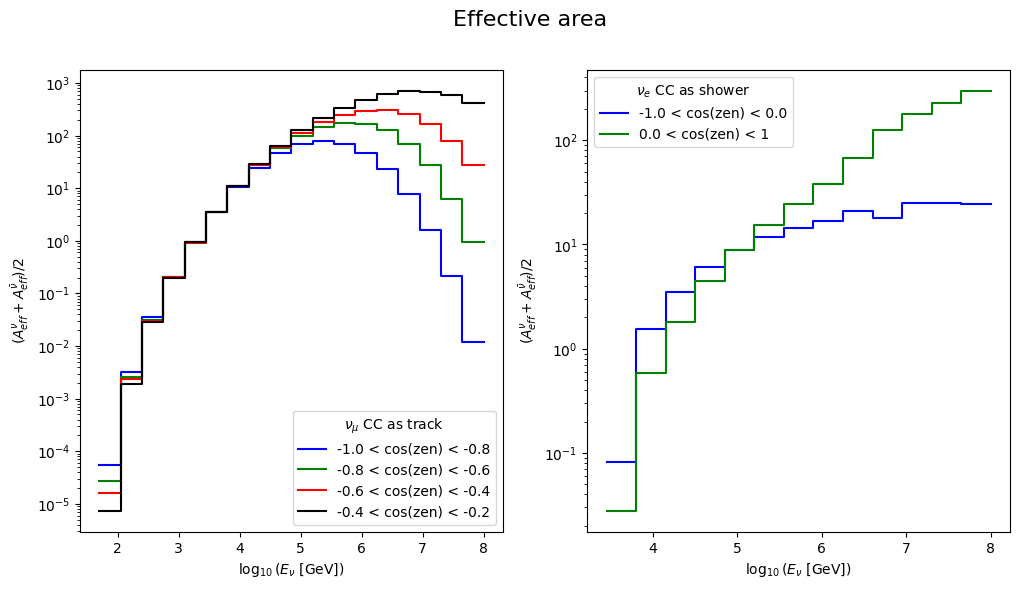

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

fig.suptitle(f"Effective area", fontsize=16)

axes[0].set_yscale("log")
axes[0].set_xlabel(r"$\log_{10}(E_{\nu}$ [GeV])")
axes[0].set_ylabel(r"($A_{eff}^{\nu}+A_{eff}^{\bar{\nu}})/2$")
axes[0].plot(
    *create_histogram(
        aeff_band1_track["log10(nu_E [GeV]) low"],
        aeff_band1_track["log10(nu_E [GeV]) high"],
        aeff_band1_track["aeff [m^2]"],
    ),
    color="blue",
    label="-1.0 < cos(zen) < -0.8",
)
axes[0].plot(
    *create_histogram(
        aeff_band2_track["log10(nu_E [GeV]) low"],
        aeff_band2_track["log10(nu_E [GeV]) high"],
        aeff_band2_track["aeff [m^2]"],
    ),
    color="green",
    label="-0.8 < cos(zen) < -0.6",
)
axes[0].plot(
    *create_histogram(
        aeff_band3_track["log10(nu_E [GeV]) low"],
        aeff_band3_track["log10(nu_E [GeV]) high"],
        aeff_band3_track["aeff [m^2]"],
    ),
    color="red",
    label="-0.6 < cos(zen) < -0.4",
)
axes[0].plot(
    *create_histogram(
        aeff_band4_track["log10(nu_E [GeV]) low"],
        aeff_band4_track["log10(nu_E [GeV]) high"],
        aeff_band4_track["aeff [m^2]"],
    ),
    color="black",
    label="-0.4 < cos(zen) < -0.2",
)
axes[0].legend(title=r"$\nu_\mu$ CC as track")

axes[1].set_yscale("log")
axes[1].set_xlabel(r"$\log_{10}(E_{\nu}$ [GeV])")
axes[1].set_ylabel(r"($A_{eff}^{\nu}+A_{eff}^{\bar{\nu}})/2$")
axes[1].plot(
    *create_histogram(
        aeff_up_shower["log10(nu_E [GeV]) low"], aeff_up_shower["log10(nu_E [GeV]) high"], aeff_up_shower["aeff [m^2]"]
    ),
    color="blue",
    label="-1.0 < cos(zen) < 0.0",
)
axes[1].plot(
    *create_histogram(
        aeff_down_shower["log10(nu_E [GeV]) low"],
        aeff_down_shower["log10(nu_E [GeV]) high"],
        aeff_down_shower["aeff [m^2]"],
    ),
    color="green",
    label="0.0 < cos(zen) < 1",
)
axes[1].legend(title=r"$\nu_e$ CC as shower")

# Declination distribution

The effective area as a function of the zenith $\theta$ can be converted to the position in the sky $\sin(dec)$. This is useful if you want to calculate the response to a point source at a given sky location. This is done by weighting the zenith bands of the effective area with the visilbity of the ARCA230 detector.

In [5]:
sindec = -0.95  # source location

aeff_decl_track = aeff_instance_track.effective_area_at_sindec(sindec)
aeff_decl_shower = aeff_instance_shower.effective_area_at_sindec(sindec)

Let's plot!

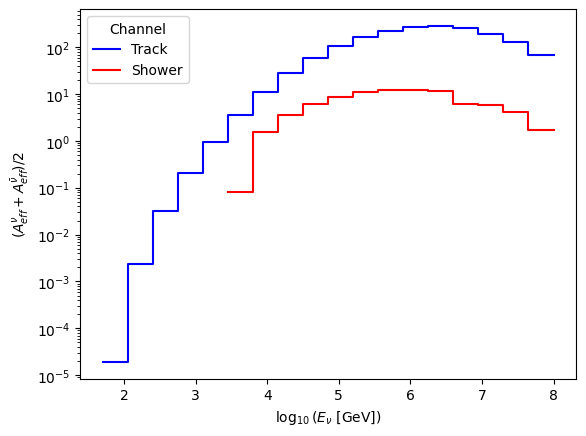

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.set_yscale("log")

ax.set_xlabel(r"$\log_{10}(E_{\nu}$ [GeV])")
ax.set_ylabel(r"($A_{eff}^{\nu}+A_{eff}^{\bar{\nu}})/2$")

ax.plot(
    *create_histogram(
        aeff_decl_track["log10(nu_E [GeV]) low"],
        aeff_decl_track["log10(nu_E [GeV]) high"],
        aeff_decl_track["aeff [m^2]"],
    ),
    color="blue",
    label="Track"
)
ax.plot(
    *create_histogram(
        aeff_decl_shower["log10(nu_E [GeV]) low"],
        aeff_decl_shower["log10(nu_E [GeV]) high"],
        aeff_decl_shower["aeff [m^2]"],
    ),
    color="red",
    label="Shower"
)

ax.legend(title="Channel")